## Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

## 1. Read and Visualize the data

In [87]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# read the dataset
country_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [89]:
country_df.shape

(167, 10)

In [90]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## 2. Clean the data

In [91]:
# missing values
round(100*(country_df.isnull().sum())/len(country_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [92]:
# No missing values found

In [93]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [94]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [95]:
# Change health from percentage to actual value
country_df['health'] = (country_df['health']/100)*country_df['gdpp']

In [96]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,41.9174,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,267.8950,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,185.9820,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,100.6050,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,735.6600,58.9,19100,1.44,76.8,2.13,12200


In [97]:
# Change exports from percentage to actual value
country_df['exports'] = (country_df['exports']/100)*country_df['gdpp']

In [98]:
# Change imports from percentage to actual value
country_df['imports'] = (country_df['imports']/100)*country_df['gdpp']

In [99]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [100]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## EDA

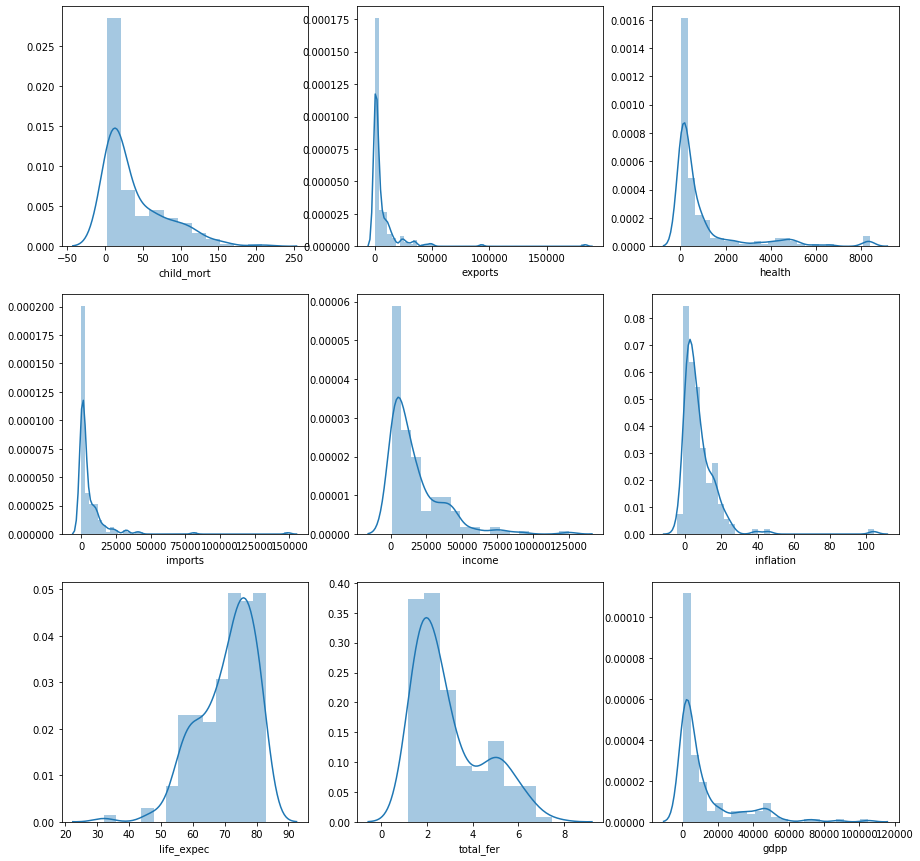

In [113]:
plt.figure(figsize = (15,15))
f = country_df.columns[1:]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country_df[i[1]])

#### Child_mort, Import, Export, Health are normally distributed. Hence not able to see any pattern
#### Here we are able to see pattern for cluster in income, total_fer, life_expec,gdpp

Lets do some more EDA

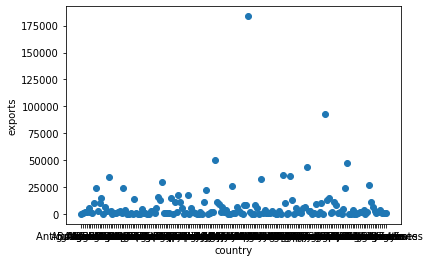

In [103]:
plt.scatter(country_df['country'],country_df['exports'])
plt.xlabel('country')
plt.ylabel('exports')
plt.show()

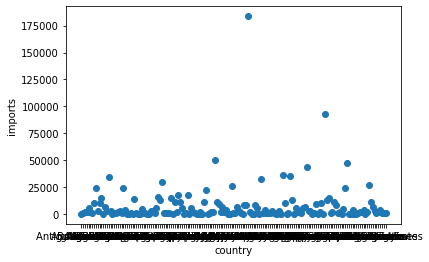

In [104]:
plt.scatter(country_df['country'],country_df['exports'])
plt.xlabel('country')
plt.ylabel('imports')
plt.show()

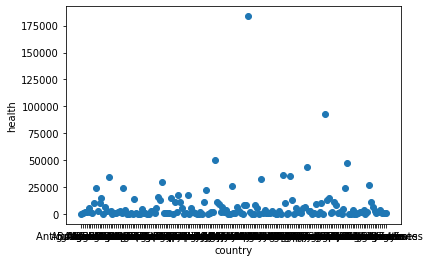

In [105]:
plt.scatter(country_df['country'],country_df['exports'])
plt.xlabel('country')
plt.ylabel('health')
plt.show()

Pattern of scatter plot for import,health and export looks alike. We can say that these fields are directly propostional to each other

In [106]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [107]:
correlation = country_df.corr()
print(correlation['child_mort'].sort_values(ascending = False),'\n')

child_mort    1.000000
total_fer     0.848478
inflation     0.288276
exports      -0.297230
imports      -0.319138
health       -0.430438
gdpp         -0.483032
income       -0.524315
life_expec   -0.886676
Name: child_mort, dtype: float64 



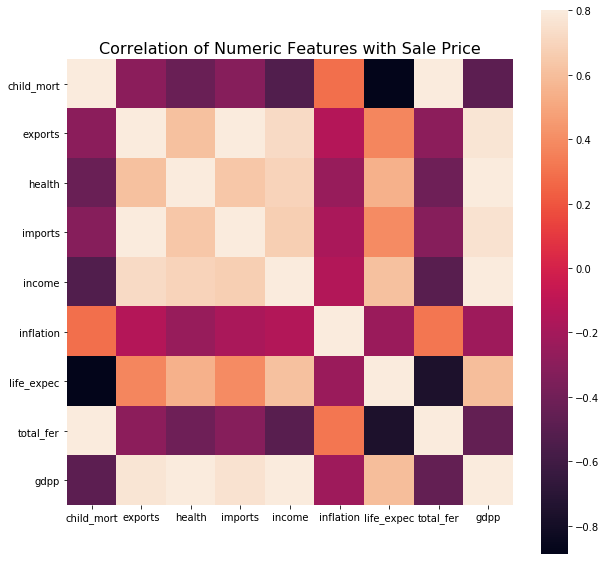

In [108]:
f , ax = plt.subplots(figsize = (10,10))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

There is high correlation in:
    - life_expec and child_mort
    - life_expec and total_fer
    - gdpp and income

## Outliers

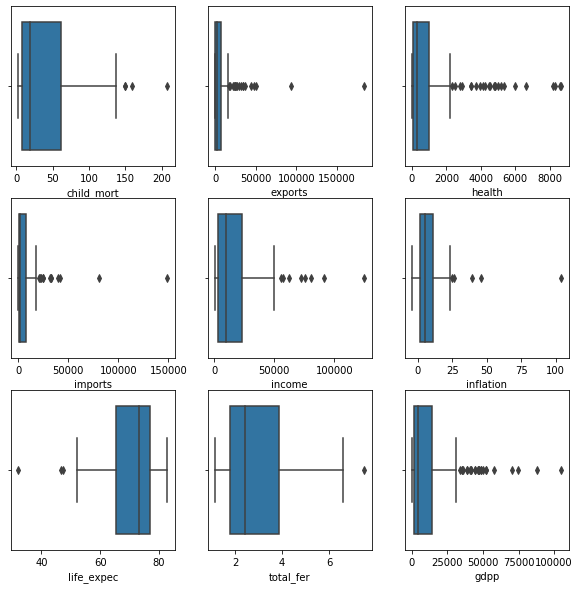

In [109]:
plt.figure(figsize = (10,10))
f = country_df.columns[1:]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data =country_df)

- Child_Mort, Inflation: We should not deal with upper range outliers but we can deal with lower range outliers.
- But for rest of the columns we should ignore the lower range outliers but we can treat upper range outliers.

Child_Mort and Inflation has upper range outlier so we ignore them.
life_expec has lower range outlier so we ignore it as well.

#### We will treat ouliers for export,import, health, total_fer, gdpp column

### Outlier treatment

We will do outlier treatment using soft scalling method

In [110]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [114]:
# export,import, health, total_fer, gdpp column

In [111]:
# health
q1 = country_df['health'].quantile(0.01)
q2 = country_df['health'].quantile(0.99)

country_df['health'][country_df['health']<=q1] = q1
country_df['health'][country_df['health']>=q2]= q2

In [116]:
q1 = country_df['exports'].quantile(0.01)
q2 = country_df['exports'].quantile(0.99)

country_df['exports'][country_df['exports']<=q1] = q1
country_df['exports'][country_df['exports']>=q2]= q2

In [117]:
q1 = country_df['imports'].quantile(0.01)
q2 = country_df['imports'].quantile(0.99)

country_df['imports'][country_df['imports']<=q1] = q1
country_df['imports'][country_df['imports']>=q2]= q2

In [118]:
q1 = country_df['total_fer'].quantile(0.01)
q2 = country_df['total_fer'].quantile(0.99)

country_df['total_fer'][country_df['total_fer']<=q1] = q1
country_df['total_fer'][country_df['total_fer']>=q2]= q2

In [119]:
q1 = country_df['gdpp'].quantile(0.01)
q2 = country_df['gdpp'].quantile(0.99)

country_df['gdpp'][country_df['gdpp']<=q1] = q1
country_df['gdpp'][country_df['gdpp']>=q2]= q2

## Hopkins

In [121]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [123]:
hopkins(country_df.drop('country', axis =1))

0.8945635277269329

## Scaling

In [124]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(country_df.drop('country', axis = 1))
df1

array([[ 1.29153238, -0.56963804, -0.56698288, ..., -1.61909203,
         1.92692802, -0.70231404],
       [-0.5389489 , -0.47387318, -0.44041711, ...,  0.64786643,
        -0.86591134, -0.49877488],
       [-0.27283273, -0.42401465, -0.48629503, ...,  0.67042323,
        -0.03542674, -0.47748297],
       ...,
       [-0.37231541, -0.49162206, -0.54027452, ...,  0.28695762,
        -0.66498765, -0.65875194],
       [ 0.44841668, -0.53996578, -0.55245405, ..., -0.34463279,
         1.15672052, -0.65875194],
       [ 1.11495062, -0.52703195, -0.54229642, ..., -2.09278484,
         1.64563484, -0.65012008]])

In [128]:
df1 = pd.DataFrame(df1)
df1.columns = country_df.columns[1:]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569638,-0.566983,-0.598844,-0.808245,0.157336,-1.619092,1.926928,-0.702314
1,-0.538949,-0.473873,-0.440417,-0.413679,-0.375369,-0.312347,0.647866,-0.865911,-0.498775
2,-0.272833,-0.424015,-0.486295,-0.476198,-0.220844,0.789274,0.670423,-0.035427,-0.477483
3,2.007808,-0.381264,-0.534113,-0.464070,-0.585043,1.387054,-1.179234,2.154642,-0.531000
4,-0.695634,-0.086754,-0.178431,0.139659,0.101732,-0.601749,0.704258,-0.544433,-0.032079


## KMeans Clustering


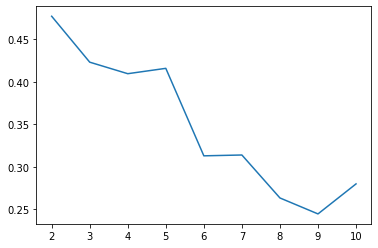

In [131]:
# Silhouette Analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])

sil =pd.DataFrame(ss)
plt.plot(sil[0], sil[1])

According to Silhouette Analysis 2,3 and 5 is higher then all other cluster.As per industry standards 2 cluster are not considered
here we can consider either 3 or 5 

Lets create elbow curve to be sure

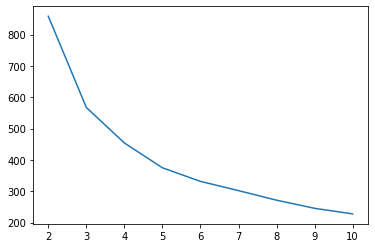

In [132]:
## Elbow Cuve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

#### Looking at this elbow curve we can consider number of cluster as 3

## KMean with K=3

In [133]:
kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [134]:
kmean.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [136]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0


In [137]:
country_df['cluster_id'] = kmean.labels_

In [138]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,1


In [139]:
country_df.cluster_id.value_counts()

1    92
0    48
2    27
Name: cluster_id, dtype: int64

Let's draw and check the clusters between :
- GDP
- Income
- Child_mort

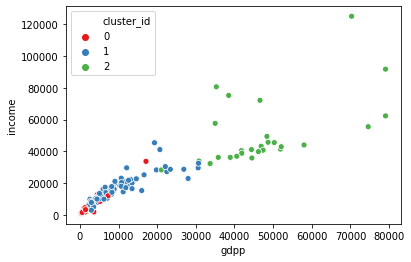

In [140]:
# gdpp and income
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id', data = country_df, palette ='Set1')

We can clearly observe that whereever income is higher gdpp is higher:
- 0 : Low income 
- 1 : Moderate income
- 2 : High income

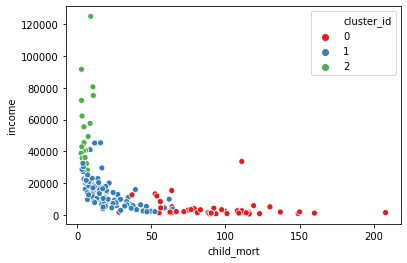

In [142]:
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id', data = country_df, palette ='Set1')

We can observe here that child mort is higher for lower income area :
- 0 : High child mort
- 1 : Moderate child mort
- 2 : Low child mort

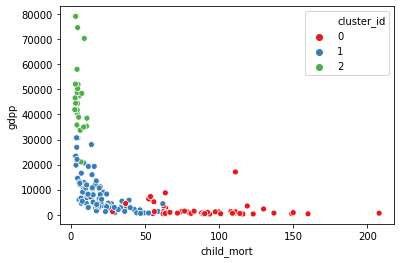

In [144]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_id', data = country_df, palette ='Set1')

We can observe here that child mort is higher for lower income area :
- 0 : Low Gdpp High child mort
- 1 : Moderate Gdpp Moderate child mort
- 2 : High Gdpp Low child mort

#### Looking at above plots we can consider that countries with cluster_id : 0 are in the direst need of aid.
Lets do cluster profiling to be more clear

## Cluster Profiling
We will try to find that cluster for which we have **Low GDPP, Low Income and High Child_Mort**

In [147]:
country_df[['gdpp', 'child_mort','income', 'cluster_id']].groupby('cluster_id').mean()

,gdpp,child_mort,income
cluster_id,,,
0,1911.400833,91.610417,3897.354167
1,8226.869565,20.177174,14169.456522
2,47476.888889,5.092593,50833.333333


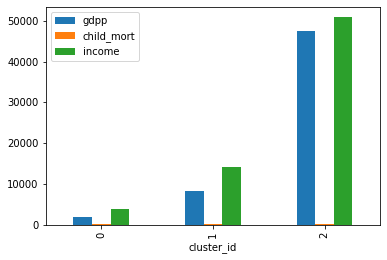

In [148]:
country_df[['gdpp', 'child_mort','income', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

From mean values we observe that where ever income and gdpp is low child mortality is high but due to difference in scale not able to visualize it. So here just to visulize it better I am multiplying child_mort with 1000

In [149]:
country_df['child_mort'] = country_df['child_mort'] * 1000 

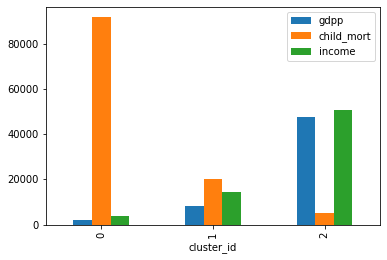

In [151]:
country_df[['gdpp', 'child_mort','income', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')


After scalling of child_mort we clearly able to see that whereever GDP and income is low child mort is high.
### 0th cluster has low income , low gdp , high child mort hence we can conclude that countries belong to cluster 0 are in the direst need of aid. 

### Find the countries

In [152]:
c1 = country_df[country_df['cluster_id']==0]

In [153]:
c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90200.0,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553.0,0
3,Angola,119000.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530.0,0
17,Benin,111000.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758.0,0
21,Botswana,52500.0,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116000.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575.0,0


In [156]:
c1.sort_values(by = ['child_mort','gdpp', 'income'], ascending = [False, True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
66,Haiti,208000.0,101.286,45.7442,428.314,1500,5.45,32.1,3.3300,662.0,0
132,Sierra Leone,160000.0,67.032,52.2690,137.655,1220,17.20,55.0,5.2000,399.0,0
32,Chad,150000.0,330.096,40.6341,390.195,1930,6.39,56.5,6.5636,897.0,0
31,Central African Republic,149000.0,52.628,17.7508,118.190,888,2.01,47.5,5.2100,446.0,0
97,Mali,137000.0,161.424,35.2584,248.508,1870,4.37,59.5,6.5500,708.0,0


## Countries that are in direst need of aid :
### - Haiti
### - Sierra Leone
### - Chad
### - Central African Republic
### - Mali

## Hierarchical Clustering
- Single and Complete: Dendogram
- Use one to perfrom final clustering
- Plot
- Profiling

In [157]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569638,-0.566983,-0.598844,-0.808245,0.157336,-1.619092,1.926928,-0.702314
1,-0.538949,-0.473873,-0.440417,-0.413679,-0.375369,-0.312347,0.647866,-0.865911,-0.498775
2,-0.272833,-0.424015,-0.486295,-0.476198,-0.220844,0.789274,0.670423,-0.035427,-0.477483
3,2.007808,-0.381264,-0.534113,-0.464070,-0.585043,1.387054,-1.179234,2.154642,-0.531000
4,-0.695634,-0.086754,-0.178431,0.139659,0.101732,-0.601749,0.704258,-0.544433,-0.032079


In [158]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90200.0,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,0
1,Albania,16600.0,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,1
2,Algeria,27300.0,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,1
3,Angola,119000.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10300.0,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,1


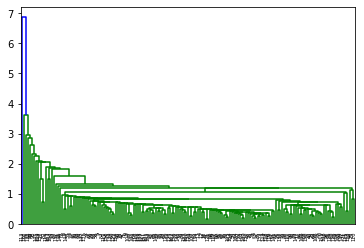

In [159]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
# single linkage
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

Single linkage doesn't making any sense. Lets try with complete linkage

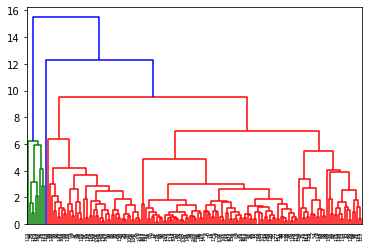

In [160]:
# complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [184]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 3, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [185]:
# assign cluster labels
country_df['cluster_labels'] = cluster_labels
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90200.0,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,0,0
1,Albania,16600.0,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,1,1
2,Algeria,27300.0,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,1,1
3,Angola,119000.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10300.0,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,1,1


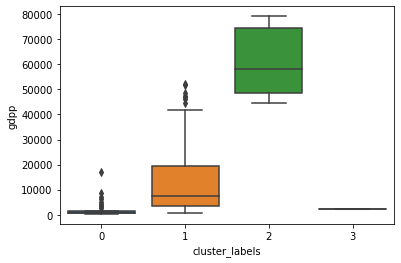

In [186]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=country_df)

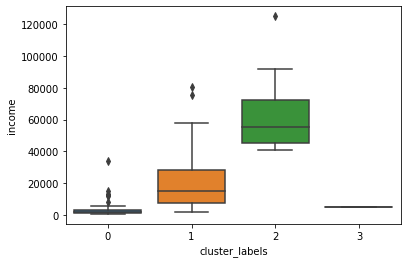

In [187]:
sns.boxplot(x='cluster_labels', y='income', data=country_df)

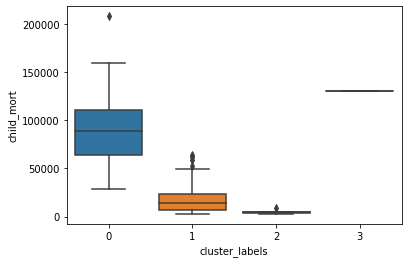

In [188]:
sns.boxplot(x='cluster_labels', y='child_mort', data=country_df)

#### In Hierarchical Clustering we get 4 clusters.
#### We can observe here for cluster 0 has high child mort , low income and low gdpp

## Cluster Profiling
We will try to find that cluster for which we have **Low GDPP, Low Income and High Child_Mort**

In [190]:
country_df[['gdpp', 'child_mort','income', 'cluster_labels']].groupby('cluster_labels').mean()

,gdpp,child_mort,income
cluster_labels,,,
0,1902.494468,90793.617021,3870.702128
1,13524.290909,17765.454545,19029.000000
2,61230.666667,4400.000000,64766.666667
3,2330.000000,130000.000000,5150.000000


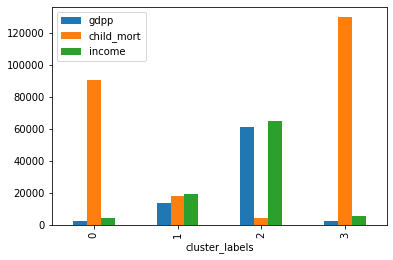

In [191]:
country_df[['gdpp', 'child_mort','income', 'cluster_labels']].groupby('cluster_labels').mean().plot(kind = 'bar')

In [194]:
c1 = country_df[country_df['cluster_labels']==0]
c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90200.0,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553.0,0,0
3,Angola,119000.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530.0,0,0
17,Benin,111000.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758.0,0,0
21,Botswana,52500.0,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350.0,0,0
25,Burkina Faso,116000.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575.0,0,0


#### Here again we can obeserve thats 0 cluster has high child_mort , Low Income and Low GDPP
#### Lets find out countries who are in the direst need of aid. 

In [195]:
c1.sort_values(by = ['child_mort','gdpp', 'income'], ascending = [False, True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
66,Haiti,208000.0,101.286,45.7442,428.314,1500,5.45,32.1,3.3300,662.0,0,0
132,Sierra Leone,160000.0,67.032,52.2690,137.655,1220,17.20,55.0,5.2000,399.0,0,0
32,Chad,150000.0,330.096,40.6341,390.195,1930,6.39,56.5,6.5636,897.0,0,0
31,Central African Republic,149000.0,52.628,17.7508,118.190,888,2.01,47.5,5.2100,446.0,0,0
97,Mali,137000.0,161.424,35.2584,248.508,1870,4.37,59.5,6.5500,708.0,0,0


## Countries that are in direst need of aid :
### - Haiti
### - Sierra Leone
### - Chad
### - Central African Republic
### - Mali